# INF 674 S1: Erdös-Rényi Graphs

## Céline Comte & Fabien Mathieu

## 2017 - 2018

The Erdös-Rényi graph $G(n,p)$ is our second example of undirected random graph.
Unlike the Galton-Watson process, the population contains a finite number $n$ of nodes
and the randomness lies in the construction of the edges.
Specficially, for any pair of *distinct* nodes $u$ and $v$,
there is an edge between $u$ and $v$ with probability $p$,
independently of the existence of the other edges.

If you want to deepen your theoretical knowledge of Erdös-Rényi graphs, you can read (this is **not** mandatory)
- Lectures 3 and 4 from the course [Networks by Daron Acemoglu and Asu Ozdaglar][acemoglu],
- Chapters 2, 3 and 4 from the book [Epidemics and Rumours in Complex Networks by Moez Draief and Laurent Massoulié][massoulie].

[acemoglu]: https://ocw.mit.edu/courses/economics/14-15j-networks-fall-2009/index.htm "Networks by Daron Acemoglu and Asu Ozdaglar"
[massoulie]: https://www.cambridge.org/core/books/epidemics-and-rumours-in-complex-networks/8C1D162F44C2C09F2B913038A7FA8BF6 "Epidemics and Rumours in Complex Networks by Moez Draief and Laurent Massoulié"

In [ ]:
%pylab inline

# 1. Draw an Erdös-Rényi graph

## Question 1

Propose a function ``erdos_renyi`` that returns a realization of the Erdös-Rényi graph $G(n,p)$.

The graph can be returned as a list of adjacency lists. For example, if you have the following graph (it is just an example),

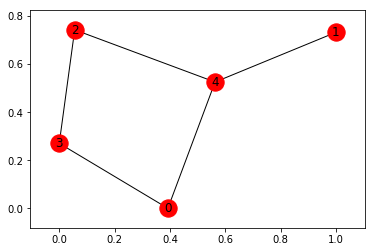

In [2]:
import networkx as nx
G=nx.Graph()
G.add_edge(0,3)
G.add_edge(0,4)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(2,4)
nx.draw_networkx(G,with_labels=True)

then the output could look like

(or more probably, if you use ``numpy`` arrays)

**Remarks:**
1. Since this function will be used over and over again throughout the practical, we recommend that your final implementation relies on ``numpy`` functions rather than ``for`` loops in order to boost the performance.
2. There are more than one way to do that. Remember that you want an undirected graph. In particular, if $v$ is in the adjacency list of $u$, then $u$ must be in the adjacency list of $v$.

**Code:**

## Question 2

Propose a function ``size_components`` that takes as input the adjacency list of an undirected graph and returns the sizes of its connected components.

**Code:**

# 2. Reed-Frost epidemic

We now describe the Reed-Frost epidemic, which is a simple model to analyze the propagation of an epidemic (disease, rumour...) in a finite population. As we will see, this random process is strongly related to the Erdös-Rényi random graph.

We consider a finite population of $n$ individuals indexed by $\{1,\ldots,n\}$. The Reed-Frost epidemic propagates step-by-step in the population as follows. At step $0$, a single individual $u \in \{1,\ldots,n\}$ is *infected* and the others are *susceptible*. Then, any individual that is infected at some step is contagious during one step and is (definitely) removed at the next step. While it is contagious, this individual can infect any other susceptible individual independently at random with probability $p$. Hence, at the end of any step $t \ge 1$, the individuals that were infected at the end of step $t-1$ are removed, the susceptible individuals of step $t-1$ that were infected during step $t$ become infected, and the others remain susceptible.

The Reed-Frost epidemic is related to the Erdös-Rényi random graph as follows. If we consider a Reed-Frost epidemic that starts at some individual $u$ and has a probability $p$ of infection, then the individuals that are infected at some step $t \ge 0$ correspond to the nodes that are at distance $t$ of $u$ in the Erdös-Rényi random graph $G(n,p)$.

## Question 1

Using the relation with Erdös-Rényi graphs, adapt the functions of Exercice 1 to compute the number of nodes that are eventually infected in the Reed-Frost epidemic, starting from a given node of the population. The inputs of this new function ``size_infection`` are the number $n$ of nodes (say, between 1000 and 10000) and the probability $p$ of infection.

Plot the average number of nodes that are eventually infected in a Reed-Frost epidemic as a function $p$.
You should choose $n$, the range of $p$ (display critical values) and the number of trials wisely according to your machine capabilities.

Discuss the results.

**Code:**

** Discussion: **

## Question 2

At this point, can you make a parallel with the phase transition of the Galton-Watson process?

**Dicussion:**

## Question 3

Write a function ``is_connected`` that takes as input the adjacency list of an undirected graph and returns ``true`` if the graph is connected. Use this function to evaluate by simulation the probability that the contagion of a Reed-Frost epidemic propagates to all $n$ individuals of the population, for the same value of $n$ as before.

**Answer:**

# 3. Heterogeneous Erdös-Rényi graphs (Stochastic block model)

We now consider heterogeneous $G(n_1,p_1,n_2,p_2,p)$ graphs defined as follows:
- The graph has $n_1$ nodes of type 1 and $n_2$ nodes of type 2.
- Two distinct nodes of type 1 are connected with probability $p_1$.
- Two distinct nodes of type 2 are connected with probability $p_2$.
- A type 1 node and a type 2 node are connected with probability $p$.

## Question 1

Propose a function that returns a realization of the heterogeneous Erdös-Rényi graph $G(n_1,p_1,n_2,p_2,p)$. The graph can be returned for example as a list of adjacency lists.

**Answer:**

## Question 2

In the case where $p_1 = p_2 = 0$, use the same approach as in Question 2.1 to guess where the critical regime occurs. The goal is not to *prove* anything, but to provide an educated guess based on what you have experienced before.

**Answer:**

## Question 3

Verify your guess with simulations. You can reuse the functions of Questions 1.2 and 2.1.

**Answer:**

## Question 4 (Bonus)

Generalize to arbitrary $p_1$, $p_2$.

**Answer:**